In [1]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Custom Functions

In [2]:
def average(df):
    return (df.sum(axis=1)/len(df.columns))

In [3]:
def rgb_info(rgb_df):
    red_light_color = rgb_df.drop("G", axis=1).drop("B", axis=1)
    generic_info("Red", red_light_color)
    green_light_color = rgb_df.drop("B", axis=1).drop("B", axis=1)
    generic_info("Green", green_light_color)
    blue_light_color = rgb_df.drop("G", axis=1).drop("R", axis=1)
    generic_info("Blue", blue_light_color)

In [4]:
def generic_info(name, df, plotting=True):
    print(name + " Average:")
    print(average(df))
    if plotting:
        average(df).plot()
        plt.show()
    print()
    print(name + " Std:")
    print(df.std(axis=1))
    if plotting:
        df.std(axis=1).plot()
        plt.show()

In [5]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line : ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

In [6]:
def draw_best_fit(a, b, X, Y):
    plt.scatter(X, Y)
    yfit = [a + b * xi for xi in X]
    plt.plot(X, yfit)
    plt.show()

### Reading Data

In [7]:
data = pd.read_excel("lab3.xlsx")

## Sensor Data

### Color Sensor

In [8]:
rgb_column_name = ["Color","R","G","B","R","G","B","R","G","B","R","G","B","R","G","B",]

#### Light RGB

In [9]:
light_color = data[2:8].dropna(axis=1)
light_color.columns = rgb_column_name
light_color = light_color.set_index(light_color["Color"]).drop("Color", axis=1)

light_color

,R,G,B,R,G,B,R,G,B,R,G,B,R,G,B
Color,,,,,,,,,,,,,,,
Pink,78,66,61,77,65,60,68,56,55,64,54,54,73,62,53
Green,27,56,30,26,54,29,26,55,29,26,55,29,26,55,29
Blue,18,55,54,17,53,57,18,54,53,18,54,53,18,55,53
Tan,68,42,34,69,42,33,70,42,34,68,42,33,70,43,34
Red,57,7,6,56,7,6,58,7,6,56,7,6,56,7,6
Yellow,69,55,24,80,63,27,74,58,25,72,58,25,73,58,25


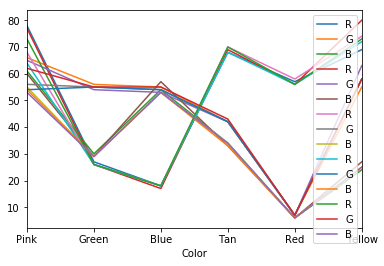

In [10]:
light_color.plot()

Red Average:
Color
Pink      72.0
Green     26.2
Blue      17.8
Tan       69.0
Red       56.6
Yellow    73.6
dtype: float64


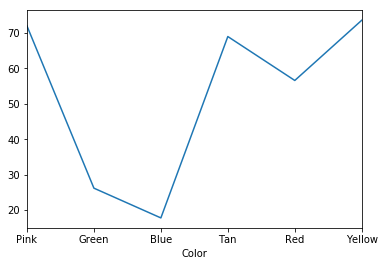


Red Std:
Color
Pink      5.958188
Green     0.447214
Blue      0.447214
Tan       1.000000
Red       0.894427
Yellow    4.037326
dtype: float64


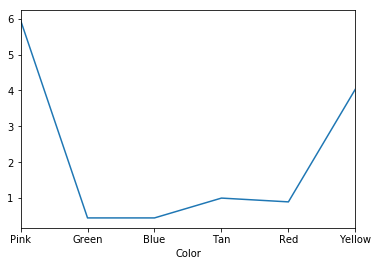

Green Average:
Color
Pink      66.3
Green     40.6
Blue      36.0
Tan       55.6
Red       31.8
Yellow    66.0
dtype: float64


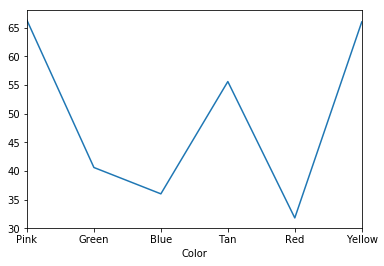


Green Std:
Color
Pink       8.042250
Green     15.189177
Blue      19.194907
Tan       14.143707
Red       26.148295
Yellow     8.666667
dtype: float64


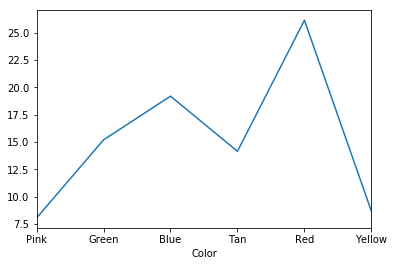

Blue Average:
Color
Pink      56.6
Green     29.2
Blue      54.0
Tan       33.6
Red        6.0
Yellow    25.2
dtype: float64


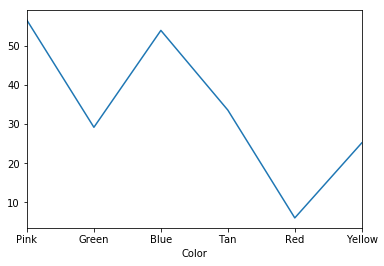


Blue Std:
Color
Pink      3.646917
Green     0.447214
Blue      1.732051
Tan       0.547723
Red       0.000000
Yellow    1.095445
dtype: float64


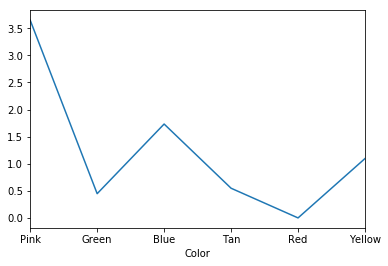

In [11]:
rgb_info(light_color)

#### Dark RGB

In [12]:
dark_color = data[10:16].dropna(axis=1)
dark_color.columns = rgb_column_name
dark_color = dark_color.set_index(dark_color["Color"]).drop("Color", axis=1)

dark_color

,R,G,B,R,G,B,R,G,B,R,G,B,R,G,B
Color,,,,,,,,,,,,,,,
Pink,78,62,61,67,56,55,64,54,53,66,57,55,65,56,52
Green,27,55,29,28,58,30,29,59,31,27,56,29,27,55,29
Blue,19,56,54,19,57,54,19,56,54,18,54,52,18,55,53
Tan,73,45,35,71,44,35,70,44,35,68,42,34,69,42,34
Red,59,7,6,58,7,6,57,7,6,57,7,7,57,7,6
Yellow,70,56,24,76,61,26,77,58,25,68,55,24,68,55,24


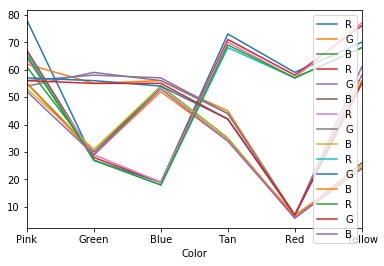

In [13]:
dark_color.plot()

Red Average:
Color
Pink      68.0
Green     27.6
Blue      18.6
Tan       70.2
Red       57.6
Yellow    71.8
dtype: float64


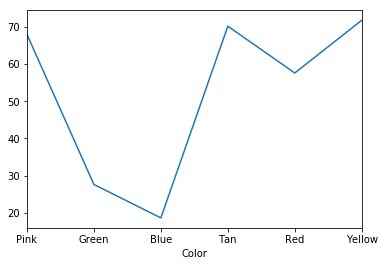


Red Std:
Color
Pink      5.700877
Green     0.894427
Blue      0.547723
Tan       1.923538
Red       0.894427
Yellow    4.381780
dtype: float64


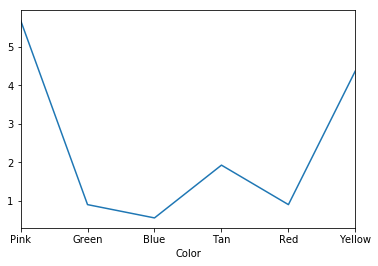

Green Average:
Color
Pink      62.5
Green     42.1
Blue      37.1
Tan       56.8
Red       32.3
Yellow    64.4
dtype: float64


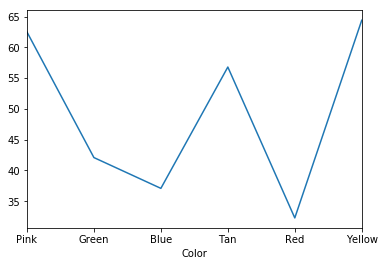


Green Std:
Color
Pink       7.214954
Green     15.343837
Blue      19.518937
Tan       14.211107
Red       26.675207
Yellow     8.500980
dtype: float64


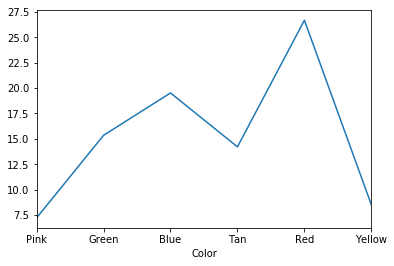

Blue Average:
Color
Pink      55.2
Green     29.6
Blue      53.4
Tan       34.6
Red        6.2
Yellow    24.6
dtype: float64


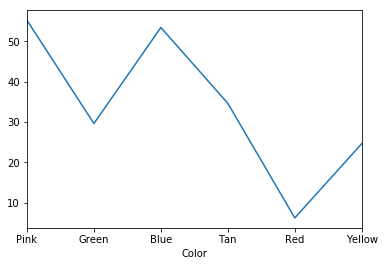


Blue Std:
Color
Pink      3.492850
Green     0.894427
Blue      0.894427
Tan       0.547723
Red       0.447214
Yellow    0.894427
dtype: float64


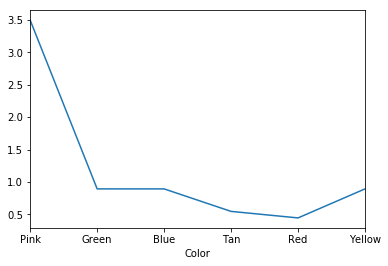

In [14]:
rgb_info(dark_color)

In [15]:
experiment_columns = ["experiment","1","2","3","4","5"]

#### Light Ambient

In [16]:
light_ambient = data[8:9].dropna(axis=1)
light_ambient.columns = experiment_columns
light_ambient = light_ambient.set_index(light_ambient["experiment"]).drop("experiment", axis=1)
light_ambient = light_ambient.astype(float)

In [17]:
light_ambient

,1,2,3,4,5
experiment,,,,,
Ambient,0.06,0.07,0.09,0.05,0.04


In [18]:
generic_info("Ambient - Light", light_ambient, plotting=False)

Ambient - Light Average:
experiment
Ambient    0.062
dtype: float64

Ambient - Light Std:
experiment
Ambient    0.019235
dtype: float64


#### Dark Ambient

In [19]:
dark_ambient = data[16:17].dropna(axis=1)
dark_ambient.columns = experiment_columns
dark_ambient = dark_ambient.set_index(dark_ambient["experiment"]).drop("experiment", axis=1)
dark_ambient = dark_ambient.astype(float)

In [20]:
dark_ambient

,1,2,3,4,5
experiment,,,,,
Ambient,0.02,0.0,0.0,0.01,0.02


In [21]:
generic_info("Ambient - Dark", dark_ambient, plotting=False)

Ambient - Dark Average:
experiment
Ambient    0.01
dtype: float64

Ambient - Dark Std:
experiment
Ambient    0.01
dtype: float64


### Gyro

In [22]:
gyro = data[32:40].dropna(axis=1)
gyro.columns = experiment_columns

In [23]:
gyro

,experiment,1,2,3,4,5
32,0,0,0,1,0,1
33,45,322,316,298,315,299
34,90,275,272,253,269,255
35,135,230,228,213,226,213
36,180,180,177,166,175,168
37,225,137,129,123,130,126
38,270,84,86,82,86,83
39,315,45,39,39,49,43


In [24]:
gyro = gyro.set_index(gyro["experiment"]).drop("experiment", axis=1)
gyro = gyro.astype(float)

In [25]:
# Because of a misunderstanding experiments rotation direction was reversed.
gyro[1:] = 360 - gyro[1:]

In [26]:
gyro

,1,2,3,4,5
experiment,,,,,
0,0.0,0.0,1.0,0.0,1.0
45,38.0,44.0,62.0,45.0,61.0
90,85.0,88.0,107.0,91.0,105.0
135,130.0,132.0,147.0,134.0,147.0
180,180.0,183.0,194.0,185.0,192.0
225,223.0,231.0,237.0,230.0,234.0
270,276.0,274.0,278.0,274.0,277.0
315,315.0,321.0,321.0,311.0,317.0


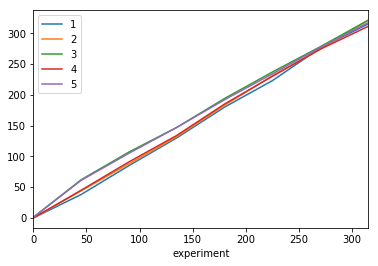

In [27]:
gyro.plot()

Gyro Average:
experiment
0        0.4
45      50.0
90      95.2
135    138.0
180    186.8
225    231.0
270    275.8
315    317.0
dtype: float64


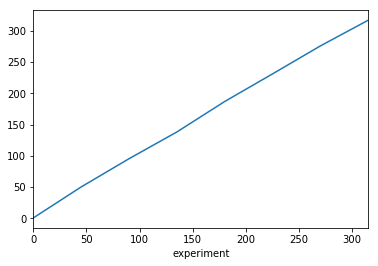


Gyro Std:
experiment
0       0.547723
45     10.839742
90     10.109402
135     8.336666
180     5.974948
225     5.244044
270     1.788854
315     4.242641
dtype: float64


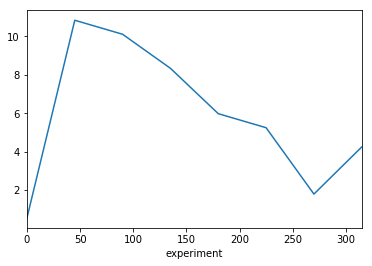

In [28]:
generic_info("Gyro", gyro)

### Ultrasonic Sensor

In [29]:
ultrasonic_distance = data[42:53].dropna(axis=1)
ultrasonic_distance.columns = experiment_columns
ultrasonic_distance = ultrasonic_distance.set_index(ultrasonic_distance["experiment"]).drop("experiment", axis=1)
ultrasonic_distance = ultrasonic_distance.astype(float)

In [30]:
ultrasonic_distance

,1,2,3,4,5
experiment,,,,,
1,3.1,3.0,2.8,3.0,3.0
2,3.0,2.8,2.8,3.0,2.8
3,3.1,3.1,3.1,3.1,3.1
4,4.0,4.0,4.0,4.0,4.0
5,4.9,5.0,5.1,5.0,5.0
10,10.1,10.1,10.1,10.1,10.1
15,14.7,14.9,14.7,14.7,14.7
20,20.5,20.5,20.5,20.5,20.5
25,25.5,25.7,25.1,25.7,25.1


Ultrasonic Distance Average:
experiment
1      2.98
2      2.88
3      3.10
4      4.00
5      5.00
10    10.10
15    14.74
20    20.50
25    25.42
30    30.72
40    40.86
dtype: float64


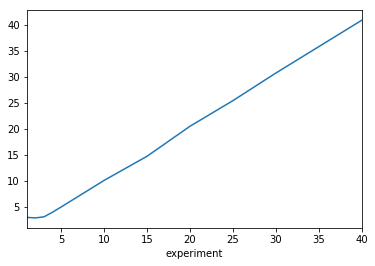


Ultrasonic Distance Std:
experiment
1     0.109545
2     0.109545
3     0.000000
4     0.000000
5     0.070711
10    0.000000
15    0.089443
20    0.000000
25    0.303315
30    0.178885
40    0.371484
dtype: float64


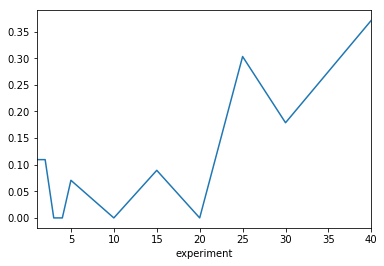

In [31]:
generic_info("Ultrasonic Distance", ultrasonic_distance)

In [32]:
X = average(ultrasonic_distance).tolist()
Y = average(ultrasonic_distance).index.tolist()

best fit line : ny = -0.42 + 1.00x


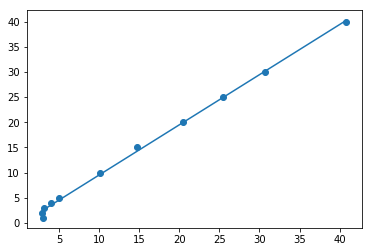

In [33]:
a, b = best_fit(X, Y)
draw_best_fit (a, b, X, Y)

## Motor Calibration

### Rotational Motion

In [34]:
rotational_motor = data[20:30].dropna(axis=1)
rotational_motor.columns = experiment_columns
rotational_motor = rotational_motor.set_index(rotational_motor["experiment"]).drop("experiment", axis=1)
rotational_motor = rotational_motor.astype(float)

In [35]:
rotational_motor

,1,2,3,4,5
experiment,,,,,
25,67.0,60.0,62.0,64.0,62.0
50,123.0,124.0,124.0,123.0,120.0
75,192.0,191.0,190.0,189.0,190.0
100,254.0,261.0,255.0,261.0,252.0
125,318.0,315.0,316.0,313.0,315.0
150,394.0,391.0,386.0,396.0,386.0
200,504.0,503.0,508.0,504.0,502.0
250,636.0,631.0,623.0,634.0,627.0
300,758.0,755.0,764.0,752.0,759.0


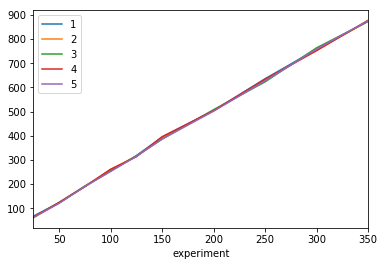

In [36]:
rotational_motor.plot()

Motor Rotation Average:
experiment
25      63.0
50     122.8
75     190.4
100    256.6
125    315.4
150    390.6
200    504.2
250    630.2
300    757.6
350    875.0
dtype: float64


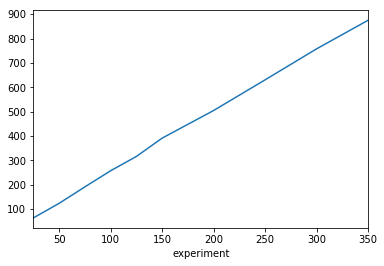


Motor Rotation Std:
experiment
25     2.645751
50     1.643168
75     1.140175
100    4.159327
125    1.816590
150    4.560702
200    2.280351
250    5.263079
300    4.505552
350    2.000000
dtype: float64


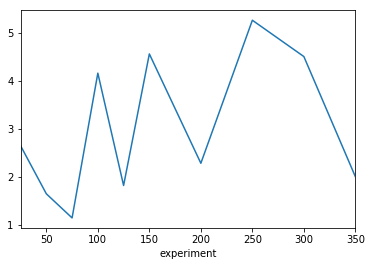

In [37]:
generic_info("Motor Rotation", rotational_motor)

### Linear Motion

In [42]:
linear_motor = data[57:66].dropna(axis=1)
linear_motor.columns = experiment_columns
linear_motor = linear_motor.set_index(linear_motor["experiment"]).drop("experiment", axis=1)
linear_motor = linear_motor.astype(float)

In [46]:
linear_motor

,1,2,3,4,5
experiment,,,,,
100,26.0,26.0,26.0,26.0,26.0
200,51.5,51.0,51.0,51.5,51.0
300,77.5,77.0,77.5,78.0,77.0
400,102.5,104.0,104.0,104.0,103.5
500,129.0,130.0,129.5,130.0,129.5
1000,229.0,227.5,210.0,221.0,216.5
2000,234.0,237.0,231.8,234.0,235.0
3000,255.5,256.0,256.0,255.5,256.0
5000,322.0,322.0,326.0,324.0,323.0


Linear Motion Average:
experiment
100      26.00
200      51.20
300      77.40
400     103.60
500     129.60
1000    220.80
2000    234.36
3000    255.80
5000    323.40
dtype: float64


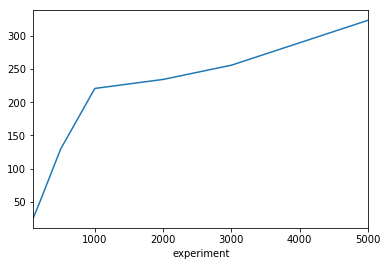


Linear Motion Std:
experiment
100     0.000000
200     0.273861
300     0.418330
400     0.651920
500     0.418330
1000    7.862888
2000    1.883614
3000    0.273861
5000    1.673320
dtype: float64


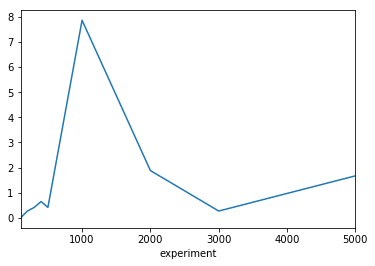

In [45]:
generic_info("Linear Motion", linear_motor)